# Feature Engineering 

In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
# loading data
df = pd.read_csv("cleaned_disease.csv")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,Present,49.0,25.30,59.16,52,1
1,144.0,0.01,4.41,28.61,Absent,55.0,28.87,2.06,63,1
2,118.0,0.08,3.48,32.28,Present,52.0,29.14,3.81,46,0
3,170.0,7.50,6.41,38.03,Present,51.0,31.99,24.26,58,1
4,134.0,13.60,3.50,27.78,Present,60.0,25.99,57.34,49,1


#### 1. Categorical Encoding

In [4]:
dummy = pd.get_dummies(df['famhist'])
df=pd.concat ((df,dummy), axis = 1)
df = df.drop(['famhist'], axis = 1)
df = df.drop(['Absent'], axis = 1)
df = df.rename(columns ={"Present":"famhist"})
titles = list(df.columns)
titles[4],titles[5],titles[6],titles[7],titles[8],titles[9]= titles[9],titles[4],titles[5],titles[6],titles[7],titles[8]
df=df[titles]
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160.0,12.00,5.73000,23.11,1,49.0,25.30000,59.16,52,1
1,144.0,0.01,4.41000,28.61,0,55.0,28.87000,2.06,63,1
2,118.0,0.08,3.48000,32.28,1,52.0,29.14000,3.81,46,0
3,170.0,7.50,6.41000,38.03,1,51.0,31.99000,24.26,58,1
4,134.0,13.60,3.50000,27.78,1,60.0,25.99000,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
456,184.0,0.40,5.98000,31.72,0,64.0,28.45000,0.00,58,0
457,182.0,4.20,4.41000,32.10,0,52.0,28.61000,18.72,52,1
458,108.0,3.00,1.59000,15.23,0,40.0,20.09000,26.64,55,0
459,118.0,5.40,9.55125,30.79,0,64.0,27.35000,23.97,40,0


#### 2.	Feature Scaling

In [5]:
X_before = df.iloc[:, 0:8]
y = df["chd"]

X_before.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol
0,160.0,12.00,5.73,23.11,1,49.0,25.30,59.16
1,144.0,0.01,4.41,28.61,0,55.0,28.87,2.06
2,118.0,0.08,3.48,32.28,1,52.0,29.14,3.81
3,170.0,7.50,6.41,38.03,1,51.0,31.99,24.26
4,134.0,13.60,3.50,27.78,1,60.0,25.99,57.34


In [6]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X_before.values), 
                         columns=X_before.columns, index=X_before.index)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol
0,0.710843,0.877754,0.554178,0.457902,1.0,0.425743,0.479989,1.000000
1,0.518072,0.000731,0.400175,0.611748,0.0,0.544554,0.641893,0.034821
2,0.204819,0.005852,0.291673,0.714406,1.0,0.485149,0.654138,0.064402
3,0.831325,0.548597,0.633513,0.875245,1.0,0.465347,0.783390,0.410074
4,0.397590,0.994788,0.294006,0.588531,1.0,0.643564,0.511281,0.969236


#### 3. Handling imbalanced data 

In [7]:
msk = df['chd'] == 1
num_to_oversample = len(df) - 2*msk.sum()
df_positive_oversample = df[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df = pd.concat([df, df_positive_oversample])
df['chd'].value_counts()

1    302
0    302
Name: chd, dtype: int64

#### 4. Feature Selection 

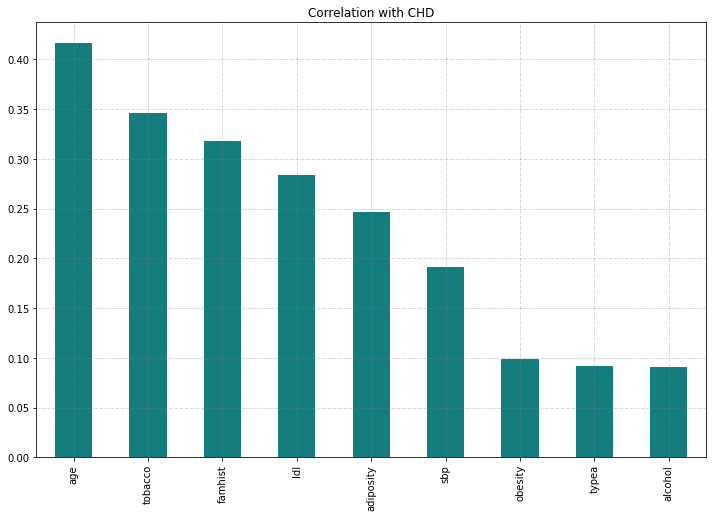

In [8]:
df.drop('chd', axis=1).corrwith(df.chd).sort_values(ascending=False).plot(kind='bar', 
                                             figsize=(12, 8),title="Correlation with CHD",color="#167D7F",)
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

In [9]:
del df['obesity']

In [10]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,alcohol,age,chd
0,160.0,12.00,5.73,23.11,1,49.0,59.16,52,1
1,144.0,0.01,4.41,28.61,0,55.0,2.06,63,1
2,118.0,0.08,3.48,32.28,1,52.0,3.81,46,0
3,170.0,7.50,6.41,38.03,1,51.0,24.26,58,1
4,134.0,13.60,3.50,27.78,1,60.0,57.34,49,1


In [12]:
df.to_csv('modeling.csv',index=False)